In [1]:
println("suyash")

suyash


In [2]:
using Flux , Images , MLDatasets , Plots 

In [25]:
using Flux: crossentropy , onecold , onehotbatch , train!,params

In [4]:
using LinearAlgebra , Random , Statistics 

In [5]:
Random.seed!(1)

TaskLocalRNG()

In [6]:
X_train_raw ,y_train_raw =MLDatasets.MNIST.traindata(Float32)

┌ Warning: MNIST.traindata() is deprecated, use `MNIST(split=:train)[:]` instead.
└ @ MLDatasets ~/.julia/packages/MLDatasets/vws5b/src/datasets/vision/mnist.jl:187


(features = [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; … ;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], targets = [5, 0, 4, 1, 9, 2, 1, 3, 1, 4  …  9, 2, 9, 5, 1, 8, 3, 5, 6, 8])

In [7]:
X_test_raw ,y_test_raw =MLDatasets.MNIST.testdata(Float32)

┌ Warning: MNIST.testdata() is deprecated, use `MNIST(split=:test)[:]` instead.
└ @ MLDatasets ~/.julia/packages/MLDatasets/vws5b/src/datasets/vision/mnist.jl:195


(features = [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; … ;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], targets = [7, 2, 1, 0, 4, 1, 4, 9, 5, 9  …  7, 8, 9, 0, 1, 2, 3, 4, 5, 6])

In [8]:
sizeof(X_train_raw )

188160000

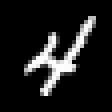

In [12]:
index=10 

img= X_train_raw[:,:,index]
colorview(Gray , img')



In [13]:
y_train_raw[index]

4

In [14]:
   X_train=Flux.flatten(X_train_raw)

784×60000 Matrix{Float32}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0

In [15]:
X_test=Flux.flatten(X_test_raw)

784×10000 Matrix{Float32}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0

In [16]:
y_train=onehotbatch(y_train_raw , 0:9) 

10×60000 OneHotMatrix(::Vector{UInt32}) with eltype Bool:
 ⋅  1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  …  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅
 ⋅  ⋅  ⋅  1  ⋅  ⋅  1  ⋅  1  ⋅  ⋅  ⋅  ⋅     ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅  ⋅  ⋅  ⋅  ⋅
 ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅     ⋅  ⋅  ⋅  1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅
 ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅  ⋅  1  ⋅  1     ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅  ⋅  ⋅
 ⋅  ⋅  1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅  ⋅  ⋅     ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅
 1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅  …  ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅  ⋅  ⋅  1  ⋅  ⋅
 ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅     ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅
 ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅     1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅
 ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅     ⋅  1  ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅  ⋅  ⋅  1
 ⋅  ⋅  ⋅  ⋅  1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅     ⋅  ⋅  1  ⋅  1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅

In [17]:
y_test =onehotbatch(y_test_raw , 0:9)

10×10000 OneHotMatrix(::Vector{UInt32}) with eltype Bool:
 ⋅  ⋅  ⋅  1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅  ⋅  …  ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅
 ⋅  ⋅  1  ⋅  ⋅  1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅     ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅  ⋅  ⋅  ⋅  ⋅
 ⋅  1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅     ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅  ⋅  ⋅  ⋅
 ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅     ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅  ⋅  ⋅
 ⋅  ⋅  ⋅  ⋅  1  ⋅  1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅     ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅  ⋅
 ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅  ⋅  ⋅  ⋅  …  1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅
 ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅     ⋅  1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  1
 1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅     ⋅  ⋅  1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅
 ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅     ⋅  ⋅  ⋅  1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅
 ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅  1  ⋅  ⋅  1     ⋅  ⋅  ⋅  ⋅  1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅

In [19]:
model=Chain(
    Dense(28*28 ,32 , relu),
      Dense(32,10),
       softmax )

Chain(
  Dense(784 => 32, relu),               # 25_120 parameters
  Dense(32 => 10),                      # 330 parameters
  NNlib.softmax,
)                   # Total: 4 arrays, 25_450 parameters, 99.664 KiB.

In [20]:
loss(x,y)= crossentropy(model(x),y)

loss (generic function with 1 method)

In [26]:
 ps=params(model)

Params([Float32[-0.08387847 -0.05129739 … 0.01803515 0.019105801; -0.077316396 0.01100761 … -0.012784295 0.0450724; … ; 0.037071276 0.040087618 … 0.08153726 0.054491512; 0.051630527 -0.011924278 … 0.08569224 0.04504712], Float32[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], Float32[0.15744792 -0.07656168 … -0.04842384 -0.13414541; -0.3762223 0.0552824 … -0.12552322 -0.2822265; … ; 0.1961483 -0.13112722 … -0.2807336 0.3678737; 0.24970926 -0.3143418 … 0.14662431 -0.054380406], Float32[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]])

In [23]:
learning_rate=0.01
opt = ADAM(learning_rate)

Adam(0.01, (0.9, 0.999), 1.0e-8, IdDict{Any, Any}())

In [24]:
loss_history=[]
epochs= 500

500

In [30]:
 for epoch in 1:epochs 
    train!(loss , ps, [(X_train , y_train)],opt)
    train_loss=loss(X_train , y_train)
    push!(loss_history,train_loss)
    println("Epoch = $epoch : Training Loss = $train_loss")
end 

Epoch = 1 : Training Loss = 0.7877831
Epoch = 2 : Training Loss = 0.67078894
Epoch = 3 : Training Loss = 0.5911647
Epoch = 4 : Training Loss = 0.5364811
Epoch = 5 : Training Loss = 0.49772683
Epoch = 6 : Training Loss = 0.4683123
Epoch = 7 : Training Loss = 0.44480518
Epoch = 8 : Training Loss = 0.42594695
Epoch = 9 : Training Loss = 0.41077128
Epoch = 10 : Training Loss = 0.3963644
Epoch = 11 : Training Loss = 0.38463184
Epoch = 12 : Training Loss = 0.3747828
Epoch = 13 : Training Loss = 0.36559424
Epoch = 14 : Training Loss = 0.35712177
Epoch = 15 : Training Loss = 0.3490166
Epoch = 16 : Training Loss = 0.34206536
Epoch = 17 : Training Loss = 0.33518124
Epoch = 18 : Training Loss = 0.32819563
Epoch = 19 : Training Loss = 0.32181603
Epoch = 20 : Training Loss = 0.3158584
Epoch = 21 : Training Loss = 0.31042442
Epoch = 22 : Training Loss = 0.30507693
Epoch = 23 : Training Loss = 0.29985964
Epoch = 24 : Training Loss = 0.29497296
Epoch = 25 : Training Loss = 0.29014713
Epoch = 26 : Trai

Epoch = 204 : Training Loss = 0.080186896
Epoch = 205 : Training Loss = 0.079827115
Epoch = 206 : Training Loss = 0.0794678
Epoch = 207 : Training Loss = 0.07911778
Epoch = 208 : Training Loss = 0.07878119
Epoch = 209 : Training Loss = 0.07844476
Epoch = 210 : Training Loss = 0.0781028
Epoch = 211 : Training Loss = 0.07775454
Epoch = 212 : Training Loss = 0.077414945
Epoch = 213 : Training Loss = 0.07708011
Epoch = 214 : Training Loss = 0.0767496
Epoch = 215 : Training Loss = 0.07642406
Epoch = 216 : Training Loss = 0.07610861
Epoch = 217 : Training Loss = 0.07579544
Epoch = 218 : Training Loss = 0.07547094
Epoch = 219 : Training Loss = 0.075139746
Epoch = 220 : Training Loss = 0.07481698
Epoch = 221 : Training Loss = 0.07450205
Epoch = 222 : Training Loss = 0.07419294
Epoch = 223 : Training Loss = 0.07388949
Epoch = 224 : Training Loss = 0.07358592
Epoch = 225 : Training Loss = 0.07327749
Epoch = 226 : Training Loss = 0.0729657
Epoch = 227 : Training Loss = 0.072655484
Epoch = 228 : T

Epoch = 402 : Training Loss = 0.03677209
Epoch = 403 : Training Loss = 0.036577653
Epoch = 404 : Training Loss = 0.036394503
Epoch = 405 : Training Loss = 0.03623256
Epoch = 406 : Training Loss = 0.036105543
Epoch = 407 : Training Loss = 0.0359674
Epoch = 408 : Training Loss = 0.035827354
Epoch = 409 : Training Loss = 0.0356673
Epoch = 410 : Training Loss = 0.035508104
Epoch = 411 : Training Loss = 0.035358876
Epoch = 412 : Training Loss = 0.03521426
Epoch = 413 : Training Loss = 0.03508406
Epoch = 414 : Training Loss = 0.034964766
Epoch = 415 : Training Loss = 0.034862265
Epoch = 416 : Training Loss = 0.034750044
Epoch = 417 : Training Loss = 0.034638975
Epoch = 418 : Training Loss = 0.034511015
Epoch = 419 : Training Loss = 0.034379743
Epoch = 420 : Training Loss = 0.03422829
Epoch = 421 : Training Loss = 0.03408217
Epoch = 422 : Training Loss = 0.033951126
Epoch = 423 : Training Loss = 0.03384076
Epoch = 424 : Training Loss = 0.033764765
Epoch = 425 : Training Loss = 0.033737976
Epo

In [31]:
y_hat_raw =model(X_test)

10×10000 Matrix{Float32}:
 1.87637f-7   1.01691f-8   2.49791f-7   …  5.78494f-11  2.28274f-9
 1.21398f-11  9.14f-10     0.998471        4.84441f-12  9.82268f-17
 3.63374f-7   1.0          0.000574046     1.89234f-17  8.65572f-10
 0.000643829  6.11768f-10  4.38443f-5      3.78447f-15  3.75766f-12
 7.05055f-13  1.1654f-26   2.65378f-6      8.77058f-13  6.55432f-8
 3.09814f-8   1.45085f-12  2.02222f-6   …  1.0          5.11425f-9
 3.38775f-17  1.4172f-11   1.17503f-7      1.13116f-10  1.0
 0.999354     1.02255f-21  8.26745f-5      3.01476f-13  1.72456f-16
 1.11512f-6   4.15718f-13  0.000823466     4.70602f-7   8.3228f-13
 3.00981f-7   2.91727f-21  2.49464f-8      1.88175f-13  4.70849f-11

In [32]:
y_hat=onecold(y_hat_raw) .-1

10000-element Vector{Int64}:
 7
 2
 1
 0
 4
 1
 4
 9
 4
 9
 0
 6
 9
 ⋮
 5
 6
 7
 8
 9
 8
 1
 2
 3
 4
 5
 6

In [33]:
y=y_test_raw

10000-element Vector{Int64}:
 7
 2
 1
 0
 4
 1
 4
 9
 5
 9
 0
 6
 9
 ⋮
 5
 6
 7
 8
 9
 0
 1
 2
 3
 4
 5
 6

In [34]:
mean(y_hat .==y)

0.9624

In [44]:
popfirst!(loss_history)
loss_history

500-element Vector{Any}:
 0.7877831f0
 0.67078894f0
 0.5911647f0
 0.5364811f0
 0.49772683f0
 0.4683123f0
 0.44480518f0
 0.42594695f0
 0.41077128f0
 0.3963644f0
 0.38463184f0
 0.3747828f0
 0.36559424f0
 ⋮
 0.026639346f0
 0.026488675f0
 0.02636949f0
 0.026245568f0
 0.026126496f0
 0.026014596f0
 0.025933258f0
 0.02585632f0
 0.025760604f0
 0.025665507f0
 0.025566895f0
 0.025477417f0

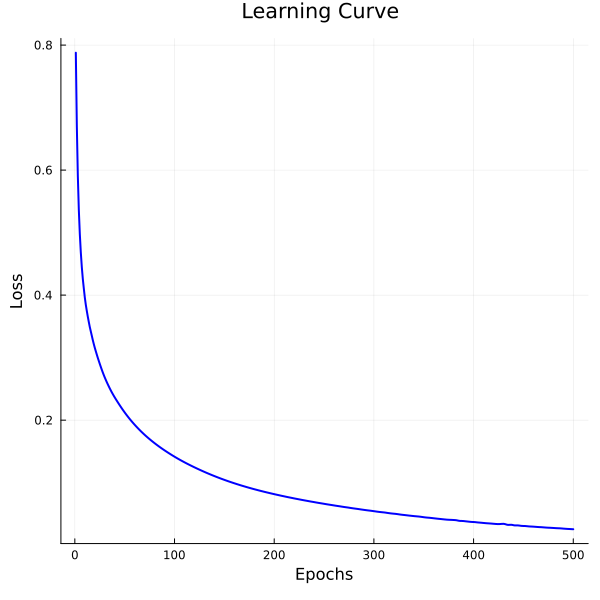

In [45]:
gr(size=(600,600))
p_l_curve = plot(1:500 , loss_history ,
       xlabel = "Epochs",
       ylabel="Loss",
      title="Learning Curve ",
        legend = false ,
    color=:blue ,
    linewidth = 2 
)